**Name:** Lukas Große Westermann  
**Exercise:** 1  
**Subject**: Computational Language Technologies

Category: *Elon Musk*.

In this notebook, Elon Musk's Wikipedia pages were examined. More specifically, it is about the category "Elon Musk". For example, the length of the articles, TTR or POS are considered. With the help of the final DataFrame, the quality of the text can also be assessed. At the end, some metrics are visualised.

## Setup

In [ ]:
#the wikipedia api is used to retrieve the data
!pip install wikipedia-api
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 4.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
#import of required modules
import os
import pandas as pd
import wikipediaapi as wapi
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from spacy import displacy
import spacy
from collections import Counter
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import numpy as np
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

#this helps to minimize the output length (sometimes it would be too long)
from google.colab.output import eval_js


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#Setting the language and the article
wiki = wapi.Wikipedia('en')
page_em = wiki.page('Elon Musk')

In [ ]:
#short test
page_em.title

'Elon Musk'

The required modules could be imported correctly. In addition, the connection to Wikipedia was successfully tested in a first short test. 

### Exploration, warm-up

The following section performs a few sample queries. The data collected here is more to get a feeling for the data, it is a first warm-up, so to speak. The DataFrame for the analysis will be created in a following step.

In [ ]:
#this is the summary of the wikipedia page of Elon Musk, but only the first 268 characters (first sentence)
page_em.summary[:268]

'Elon Reeve Musk  (; born June 28, 1971) is an entrepreneur and business magnate. He is the founder, CEO, and Chief Engineer at SpaceX; early-stage investor, CEO, and Product Architect of Tesla, Inc.; founder of The Boring Company; and co-founder of Neuralink and OpenA'

In [ ]:
#this helps to minimize the output, the frame would be longer otherwise
eval_js('google.colab.output.setIframeHeight("225")')

#The sections of Elon's Wikipedia page can be retrieved as follows
print(page_em.sections)

[Section: Early life (1):

Subsections (2):
Section: Childhood and family (2):
Elon Reeve Musk was born on June 28, 1971, in Pretoria, South Africa. His mother is Maye Musk (née Haldeman), a model and dietitian born in Saskatchewan, Canada, but raised in South Africa. His father is Errol Musk, a South African electromechanical engineer, pilot, sailor, consultant, and property developer who was once a half owner of a Zambian emerald mine near Lake Tanganyika. Musk has a younger brother, Kimbal (born 1972), and a younger sister, Tosca (born 1974). His maternal grandfather, Joshua Haldeman, was an American-born Canadian, and Musk has British and Pennsylvania Dutch ancestry. The family was very wealthy in Elon's youth; Errol Musk once said, "We had so much money at times we couldn't even close our safe". After his parents divorced in 1980, Musk mostly lived with his father in Pretoria and elsewhere, a choice he made two years after the divorce and subsequently regretted. Musk has become es

In [ ]:
eval_js('google.colab.output.setIframeHeight("225")')

#The entire text can be retrieved as follows
print(page_em.text)

Elon Reeve Musk  (; born June 28, 1971) is an entrepreneur and business magnate. He is the founder, CEO, and Chief Engineer at SpaceX; early-stage investor, CEO, and Product Architect of Tesla, Inc.; founder of The Boring Company; and co-founder of Neuralink and OpenAI. With an estimated net worth of around US$304 billion as of January 2022, Musk is the second wealthiest person in the world according to the Bloomberg billionaires index.Musk was born to a Canadian mother and South African father, and raised in Pretoria, South Africa. He briefly attended the University of Pretoria before moving to Canada at age 17 to avoid conscription. He was enrolled at Queen's University and transferred to the University of Pennsylvania two years later, where he received a bachelor's degree in economics and physics, then moved to California in 1995 to attend Stanford University but decided instead to pursue a business career, co-founding the web software company Zip2 with his brother Kimbal. The start

In [ ]:
eval_js('google.colab.output.setIframeHeight("225")')

def sections_pretty(sections, level=0):
  for s in sections:
    #print sections with one tab space intended
    print(level * "\t-", (s.title + ': '), s.text[0:80])
    sections_pretty(s.sections, level + 1)
            
sections_pretty(page_em.sections)

 Early life:  
	- Childhood and family:  Elon Reeve Musk was born on June 28, 1971, in Pretoria, South Africa. His mother
	- Education:  Aware that it would be easier to enter the United States from Canada, Musk appli
 Business career:  
	- Zip2:  In 1995, Musk, Kimbal, and Greg Kouri founded web software company Zip2 with fun
	- X.com and PayPal:  In 1999, Musk co-founded X.com, an online financial services and e-mail payment 
	- SpaceX:  In 2001, Musk became involved with the nonprofit Mars Society. He was inspired b
	- Tesla:  Tesla, Inc.—originally Tesla Motors—was incorporated in July 2003 by Martin Eber
	-	- SEC lawsuit:  In September 2018, Musk was sued by the US Securities and Exchange Commission (S
	- SolarCity and Tesla Energy:  Musk provided the initial concept and financial capital for SolarCity, which his
	- Neuralink:  In 2016, Musk co-founded Neuralink, a neurotechnology startup company to integra
	- The Boring Company:  In 2016, Musk founded The Boring Company to constr

In [ ]:
eval_js('google.colab.output.setIframeHeight("225")')

#print the categories from Wikipedia
def page_categories(page):
        categories = page.categories
        for title in sorted(categories.keys()):
            print("%s: %s" % (title, categories[title]))


print("Categories", "\n")
print("Number of Categories: " + str(len(page_em.categories)), "\n")
page_categories(page_em)

Categories 

Number of Categories: 121 

Category:1971 births: Category:1971 births (id: ??, ns: 14)
Category:20th-century American businesspeople: Category:20th-century American businesspeople (id: ??, ns: 14)
Category:20th-century Canadian businesspeople: Category:20th-century Canadian businesspeople (id: ??, ns: 14)
Category:20th-century South African businesspeople: Category:20th-century South African businesspeople (id: ??, ns: 14)
Category:21st-century American businesspeople: Category:21st-century American businesspeople (id: ??, ns: 14)
Category:21st-century Canadian businesspeople: Category:21st-century Canadian businesspeople (id: ??, ns: 14)
Category:21st-century South African businesspeople: Category:21st-century South African businesspeople (id: ??, ns: 14)
Category:All Wikipedia articles written in American English: Category:All Wikipedia articles written in American English (id: ??, ns: 14)
Category:All articles containing potentially dated statements: Category:All artic

## Analysis

These were a few first steps to get a feeling for the environment. The next step is to create the DataFrame. In addition to the title, a short description should also be created, as in the lecture.

### Creating the DataFrame

In [ ]:
# Get members for a category together with a short description
def members_collector(category):
      mdict = {}
      categorymembers = category.categorymembers
      for c in categorymembers.values():
        if c.ns == 0:                                                            
          # Exclude categories within the category
          mdict[c.title] = c.summary
      return mdict

In [ ]:
elon_musk_categories = wiki.page("Category:Elon Musk")
em_dict = members_collector(elon_musk_categories)

In [ ]:
# Create the DataFrame
df = pd.DataFrame([em_dict.keys(), em_dict.values()]).T
df.columns = ['Name', 'Description']
df = df.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
df

,Name,Description
0,Elon Musk,"Elon Reeve Musk (; born June 28, 1971) is an entrepreneur and business magnate. He is the founder, CEO, and Chief Engineer at SpaceX; early-stage investor, CEO, and Product Architect of Tesla, Inc.; founder of The Boring Company; and co-founder of Neuralink and OpenAI. With an estimated net worth of around US$304 billion as of January 2022, Musk is the second wealthiest person in the world according to the Bloomberg billionaires index.Musk was born to a Canadian mother and South African father, and raised in Pretoria, South Africa. He briefly attended the University of Pretoria before moving to Canada at age 17 to avoid conscription. He was enrolled at Queen's University and transferred to the University of Pennsylvania two years later, where he received a bachelor's degree in economics and physics, then moved to California in 1995 to attend Stanford University but decided instead to pursue a business career, co-founding the web software company Zip2 with his brother Kimbal. The startup was acquired by Compaq for $307 million in 1999. The same year, Musk co-founded online bank X.com, which merged with Confinity in 2000 to form PayPal. The company was bought by eBay in 2002 for $1.5 billion. In 2002, Musk founded SpaceX, an aerospace manufacturer and space transport services company, of which he is CEO and CTO. In 2004, he joined electric vehicle manufacturer Tesla Motors, Inc. (now Tesla, Inc.) as chairman and product architect, becoming its CEO in 2008. In 2006, he helped create SolarCity, a solar energy services company that was later acquired by Tesla and became Tesla Energy. In 2015, he co-founded OpenAI, a nonprofit research company that promotes friendly artificial intelligence. In 2016, he co-founded Neuralink, a neurotechnology company focused on developing brain–computer interfaces, and founded The Boring Company, a tunnel construction company. Musk has proposed the Hyperloop, a high-speed vactrain transportation system. Musk has been the subject of criticism due to his unorthodox or unscientific stances and highly publicized controversial statements. In 2018, he was sued for defamation by a British caver who advised in the Tham Luang cave rescue; a California jury ruled in favor of Musk. In the same year, he was sued by the US Securities and Exchange Commission (SEC) for falsely tweeting that he had secured funding for a private takeover of Tesla. He settled with the SEC, temporarily stepping down from his chairmanship and agreed to limitations on his Twitter usage. Musk has spread misinformation about the COVID-19 pandemic and has received criticism from experts for his other views on such matters as artificial intelligence, cryptocurrency, and public transport."
1,The Boring Company,"The Boring Company (TBC) is an American infrastructure and tunnel construction services company founded by Elon Musk. Its current and proposed projects are designed for intra-city (""loop"") transit systems.TBC has completed two tunnels in Las Vegas for loop travel. It has also completed one tunnel for testing Hyperloop and loop travel in Los Angeles County. Other tunnels are in various stages of discussion and planning. Musk cited difficulty with Los Angeles traffic and what he sees as limitations with the current two-dimensional transportation network as his early inspiration for the project. The Boring Company was initially formed as a subsidiary of SpaceX, becoming a separate and fully independent company in 2018. As of December 2018, 90% of the equity was owned by Musk, with 6% held by SpaceX in return for the use of SpaceX resources during the initial startup of the company. Outside investments during 2019 have changed the equity split."
2,"Elon Musk: Tesla, SpaceX, and the Quest for a Fantastic Future","Elon Musk: Tesla, SpaceX, and the Quest for a Fantastic Future is Ashlee Vance's biography of Elon Musk, published in 2015. The book traces Elon Musk's life from his childhood up to the time he spen

### Preprocess

In [ ]:
#Return from styler object to pandas DataFrame 
df = df.data
df.head()

,Name,Description
0,Elon Musk,"Elon Reeve Musk (; born June 28, 1971) is an ..."
1,The Boring Company,The Boring Company (TBC) is an American infras...
2,"Elon Musk: Tesla, SpaceX, and the Quest for a ...","Elon Musk: Tesla, SpaceX, and the Quest for a ..."
3,GivePower,GivePower is a 501(c)(3) non-profit organizati...
4,Hyperloop,A Hyperloop is a proposed high-speed transport...


You can see that the text in the Description column is unclean, so it is better to clean the text first.

In [ ]:
def preprocess(column):
  for i in df.index:
    df.loc[:,(column)].loc[i] = df.loc[:,(column)].loc[i].replace("\n", " ")
    df.loc[:,(column)].loc[i] = df.loc[:,(column)].loc[i].replace("(; ", "(")
    df.loc[:,(column)].loc[i] = df.loc[:,(column)].loc[i].replace('\\', " ")
    

preprocess("Description")


In [ ]:
df.head()

,Name,Description
0,Elon Musk,"Elon Reeve Musk (born June 28, 1971) is an en..."
1,The Boring Company,The Boring Company (TBC) is an American infras...
2,"Elon Musk: Tesla, SpaceX, and the Quest for a ...","Elon Musk: Tesla, SpaceX, and the Quest for a ..."
3,GivePower,GivePower is a 501(c)(3) non-profit organizati...
4,Hyperloop,A Hyperloop is a proposed high-speed transport...


### Article length

The first thing to measure is the length of the articles. 

In [ ]:
def articel_length_not_cleaned():
  for i in df.Name:
    page_text = wiki.page(i).text
    page_length = len(page_text)
    print(page_length)

articel_length_not_cleaned()

45483
25218
1535
2456
34126
5129
2912
4911
2006
20583
7844
21133
5996
3796
1650
28961
40354
1395
21658
19699
14219
74612
8748
19452
2357
3334


This length represents the length of the different category pages. However, this represents uncleanded data. Long texts do not automatically mean linguistically more complex texts, it may even be that no new content is added at all. Therefore, stopwords are now removed in order to concentrate on the content. It will be cleaned in a next step

In [ ]:
def article_length_cleaned():
  position = 0
  #add new column
  df['Article_length'] = ' '

  for i in df.Name:
      #List comprehension helps to code more efficiently
      #creates tokens (per word) then removes stop-words, only words - no digits or other representations
      tokens = [w for w in wiki.page(i).text if w.isalpha()]
      no_stops = [t for t in tokens if t not in stopwords.words('english')]
      df.loc[:, ('Article_length')].loc[position] = len(no_stops)
      position += 1

article_length_cleaned()

In [ ]:
df

,Name,Description,Article_length
0,Elon Musk,"Elon Reeve Musk (born June 28, 1971) is an en...",19808
1,The Boring Company,The Boring Company (TBC) is an American infras...,11089
2,"Elon Musk: Tesla, SpaceX, and the Quest for a ...","Elon Musk: Tesla, SpaceX, and the Quest for a ...",687
3,GivePower,GivePower is a 501(c)(3) non-profit organizati...,1050
4,Hyperloop,A Hyperloop is a proposed high-speed transport...,15085
5,List of awards and honors received by Elon Musk,Business magnate and industrial designer Elon...,2255
6,Members Only (South Park),"""Members Only"" is the eighth episode in the tw...",1331
7,The Musk Who Fell to Earth,"""The Musk Who Fell to Earth"" is the twelfth ep...",2114
8,Justine Musk,Justine Musk (born Jennifer Justine Wilson; Se...,899
9,Grimes (musician),"Claire Elise Boucher (born March 17, 1988), k...",8990


### Most common words

Now the three most used words per article are counted. However, words from the article title are excluded, as they do not bring much additional value. In addition, the name Elon Musk should not be taken into account. 

In [ ]:
def top_n_most_common_words(topN):
  #create new column
  df['most_common_words'] = ' '
  i = 0

  for article in df.Name:
    #creates token, lowers every word so we don't have duplicates, removes stopwords and uses only words
    tokens = [w.lower() for w in word_tokenize(wiki.page(article).text) if w.isalpha()]
    no_stops = [t for t in tokens if t not in stopwords.words('english')]

    #this is a custom list, as they don't add useful information
    custom_list = ["elon","musk","company","ceo"]

    #the title words should also not be included
    additional_words = word_tokenize(df.loc[:,('Name')].loc[i])
    for token in additional_words:
      custom_list.append(token)
    custom_list = [c.lower() for c in custom_list]

    #removes the words from the custom list
    only_words = [t for t in no_stops if t not in custom_list]

    df.loc[:, ('most_common_words')].loc[i] = Counter(only_words).most_common(topN)
    i += 1

top_n_most_common_words(3)

In [ ]:
df

,Name,Description,Article_length,most_common_words
0,Elon Musk,"Elon Reeve Musk (born June 28, 1971) is an en...",19808,"[(tesla, 55), (spacex, 23), (first, 18)]"
1,The Boring Company,The Boring Company (TBC) is an American infras...,11089,"[(tunnel, 58), (would, 32), (project, 24)]"
2,"Elon Musk: Tesla, SpaceX, and the Quest for a ...","Elon Musk: Tesla, SpaceX, and the Quest for a ...",687,"[(book, 7), (vance, 6), (biography, 2)]"
3,GivePower,GivePower is a 501(c)(3) non-profit organizati...,1050,"[(solar, 9), (water, 5), (organization, 4)]"
4,Hyperloop,A Hyperloop is a proposed high-speed transport...,15085,"[(would, 42), (system, 29), (tube, 25)]"
5,List of awards and honors received by Elon Musk,Business magnate and industrial designer Elon...,2255,"[(award, 12), (space, 12), (world, 8)]"
6,Members Only (South Park),"""Members Only"" is the eighth episode in the tw...",1331,"[(episode, 6), (troll, 5), (trace, 4)]"
7,The Musk Who Fell to Earth,"""The Musk Who Fell to Earth"" is the twelfth ep...",2114,"[(episode, 12), (burns, 10), (homer, 7)]"
8,Justine Musk,Justine Musk (born Jennifer Justine Wilson; Se...,899,"[(born, 3), (books, 3), (wife, 3)]"
9,Grimes (musician),"Claire Elise Boucher (born March 17, 1988), k...",8990,"[(album, 39), (music, 38), (released, 24)]"


### TTR

The Type-Token-Ratio is a good indicator to measure the complexity of the text, therefore it will be calculated now for each wikipedia article.

In [ ]:
def TTR():  
  #create new column
  df['TTR_wiki_text'] = ' '
  i = 0

  #for each article, the TTR will be calculated
  for article in df.Name:
    #stop-words and non-alphabetic characters will be filtered out
    tokens = [w.lower() for w in word_tokenize(wiki.page(article).text) if w.isalpha()]
    no_stops = [t for t in tokens if t not in stopwords.words('english')]

    total = len(no_stops)
    unique = len(set(no_stops))
  
    df.loc[:, ('TTR_wiki_text')].loc[i] = unique/total

    i += 1

TTR()

In [ ]:
df.head()

,Name,Description,Article_length,most_common_words,TTR_wiki_text
0,Elon Musk,"Elon Reeve Musk (born June 28, 1971) is an en...",19808,"[(tesla, 55), (spacex, 23), (first, 18)]",0.49198
1,The Boring Company,The Boring Company (TBC) is an American infras...,11089,"[(tunnel, 58), (would, 32), (project, 24)]",0.450823
2,"Elon Musk: Tesla, SpaceX, and the Quest for a ...","Elon Musk: Tesla, SpaceX, and the Quest for a ...",687,"[(book, 7), (vance, 6), (biography, 2)]",0.79021
3,GivePower,GivePower is a 501(c)(3) non-profit organizati...,1050,"[(solar, 9), (water, 5), (organization, 4)]",0.653659
4,Hyperloop,A Hyperloop is a proposed high-speed transport...,15085,"[(would, 42), (system, 29), (tube, 25)]",0.44422


### Syntax

In this part, the syntax is examined. 

In [ ]:
#first, loading the necessary information into the notebook
nlp = spacy.load('en_core_web_sm') 

In [ ]:
#This is one example sentence from the description column
doc = nlp(str(sent_tokenize(df['Description'].loc[1])[0]))

#Here, the syntax is visualized
displacy.render(doc, style="dep", jupyter=True, options={'fine_grained': True})

In [ ]:
#if something is unclear, this is how to look up the abbreviations
spacy.explain(u'VBZ')

'verb, 3rd person singular present'

In [ ]:
#now, the top 3 POS are calculated for each article
def topN_syntax(topN):
  #create new column
  df['syntax'] = ' '
  i = 0

  for article in df.Name:
    #creates token, lowers every word so we don't have duplicates, removes stopwords and uses only words
    sentences = [w.lower() for w in sent_tokenize(wiki.page(article).text)]
    no_stops = [t for t in sentences if t not in stopwords.words('english')]
    doc = nlp(str(no_stops))

    pos = []

    for token in doc:
      #a lot of punctuation occures, but it doesn't add value, therfore it is not included
      if token.pos_ == 'PUNCT':
        continue
      else:
        pos.append(token.pos_)

    df.loc[:, ('syntax')].loc[i] = Counter(pos).most_common(topN)
    i += 1

topN_syntax(3)

    

In [ ]:
df.head()

,Name,Description,Article_length,most_common_words,TTR_wiki_text,syntax
0,Elon Musk,"Elon Reeve Musk (born June 28, 1971) is an en...",19808,"[(tesla, 55), (spacex, 23), (first, 18)]",0.49198,"[(NOUN, 1711), (VERB, 937), (ADP, 918)]"
1,The Boring Company,The Boring Company (TBC) is an American infras...,11089,"[(tunnel, 58), (would, 32), (project, 24)]",0.450823,"[(NOUN, 1020), (ADP, 510), (VERB, 504)]"
2,"Elon Musk: Tesla, SpaceX, and the Quest for a ...","Elon Musk: Tesla, SpaceX, and the Quest for a ...",687,"[(book, 7), (vance, 6), (biography, 2)]",0.79021,"[(NOUN, 56), (PROPN, 51), (ADP, 36)]"
3,GivePower,GivePower is a 501(c)(3) non-profit organizati...,1050,"[(solar, 9), (water, 5), (organization, 4)]",0.653659,"[(NOUN, 97), (ADP, 52), (VERB, 43)]"
4,Hyperloop,A Hyperloop is a proposed high-speed transport...,15085,"[(would, 42), (system, 29), (tube, 25)]",0.44422,"[(NOUN, 1392), (ADP, 689), (DET, 620)]"


### Adjective Richness

This is a separate indicator, adjectives help to embellish everyday sentences and help to communicate in a more illustrated way. The more adjectives used, the more colourful the story told. Wikipedia is of course linguistically sober in contrast to the tabloid newspaper. The Adjective Index is calculated by dividing the total number of adjectives by the total number of other sentence items. 

In [ ]:
def adj_richness():
  #create new column
  df['ADJ_Richness'] = ' '
  i = 0

  for article in df.Name:
    #creates token, lowers every word so we don't have duplicates, removes stopwords and uses only words
    sentences = [w.lower() for w in sent_tokenize(wiki.page(article).text)]
    no_stops = [t for t in sentences if t not in stopwords.words('english')]
    doc = nlp(str(no_stops))

    pos = []

    counter = 0
    for token in doc:
      if token.pos_ == 'ADJ':
        counter += 1
      #a lot of punctuation occures, but it doesn't add value, therfore it is not included
      elif token.pos_ == 'PUNCT':
        continue
      else:
        pos.append(token.pos_)
    
    adjective = counter
    sum_all = len(doc)

    df.loc[:, ('ADJ_Richness')].loc[i] = adjective/sum_all
    i += 1

adj_richness()

In [ ]:
df.sort_values(by='ADJ_Richness', ascending=False).head()

,Name,Description,Article_length,most_common_words,TTR_wiki_text,syntax,ADJ_Richness
3,GivePower,GivePower is a 501(c)(3) non-profit organizati...,1050,"[(solar, 9), (water, 5), (organization, 4)]",0.653659,"[(NOUN, 97), (ADP, 52), (VERB, 43)]",0.0909091
11,OpenAI,OpenAI is an artificial intelligence (AI) rese...,9488,"[(ai, 30), (stated, 17), (research, 14)]",0.560215,"[(NOUN, 813), (VERB, 458), (ADP, 411)]",0.0825581
19,Tesla Energy,Tesla Energy is the clean energy subsidiary of...,8453,"[(solar, 78), (solarcity, 26), (roof, 24)]",0.393362,"[(NOUN, 877), (VERB, 407), (ADP, 356)]",0.0733611
10,Neuralink,Neuralink Corporation is a neurotechnology com...,3476,"[(brain, 8), (technology, 8), (system, 7)]",0.673684,"[(NOUN, 316), (ADP, 154), (VERB, 148)]",0.0686667
4,Hyperloop,A Hyperloop is a proposed high-speed transport...,15085,"[(would, 42), (system, 29), (tube, 25)]",0.44422,"[(NOUN, 1392), (ADP, 689), (DET, 620)]",0.0683426


So, the result is especially interesting, because the article form the non-profit organization 'GivePower' is relatively more emotionally written than the rest of the articles. This can also make sense, because then it is easier to convince people to donate money.  

### Polarity

Polarity measures whether a text has more positive or negative connotations, Wikipedia articles should be neutral. Let's see if this is true.

In [ ]:
#this creates a new polarity column
df['Polarity'] = (df['Description'].map(lambda text: TextBlob(str(text)).sentiment.polarity)).round(2)

In [ ]:
df.sort_values(by='Polarity', ascending=False).head()

,Name,Description,Article_length,most_common_words,TTR_wiki_text,syntax,ADJ_Richness,Polarity
13,Elon Musk in popular culture,Elon Musk has influenced or been referenced in...,1744,"[(episode, 7), (also, 5), (film, 5)]",0.705882,"[(NOUN, 144), (PROPN, 116), (ADP, 95)]",0.0525687,0.30
5,List of awards and honors received by Elon Musk,Business magnate and industrial designer Elon...,2255,"[(award, 12), (space, 12), (world, 8)]",0.572034,"[(NOUN, 188), (PROPN, 163), (ADP, 128)]",0.0471014,0.25
24,X.com,X.com was an online bank co-founded by Elon Mu...,1031,"[(paypal, 9), (confinity, 5), (july, 4)]",0.675926,"[(NOUN, 82), (PROPN, 61), (VERB, 51)]",0.0606061,0.22
18,List of Easter eggs in Tesla products,Tesla products include a significant number of...,9631,"[(model, 36), (egg, 35), (mode, 30)]",0.416985,"[(NOUN, 1061), (DET, 576), (VERB, 441)]",0.0482474,0.22
2,"Elon Musk: Tesla, SpaceX, and the Quest for a ...","Elon Musk: Tesla, SpaceX, and the Quest for a ...",687,"[(book, 7), (vance, 6), (biography, 2)]",0.79021,"[(NOUN, 56), (PROPN, 51), (ADP, 36)]",0.0505618,0.20


Every Polarity is below 0.5 and higher than -0.5. Therefore, the description of the articles can be considered to be neutral (like they should).

### Visualizations

#### Wordcloud

Now a Wordcloud is created for all articles' description together.

In [ ]:
sns.set(color_codes=True)
def all_articles():
  all_category_description = df['Description']

  #here, all descriptions are concatenated
  global together
  together = all_category_description.str.cat()

  #and it has to be cleaned a little bit again
  together = re.sub('[\']',  '', together) 

  #Elon's name is frequently used, but it doesn't add useful information 
  should_not_be_included = ['Elon Musk', 'Elon', 'Musk']

  for entry in should_not_be_included:
    together = re.sub(entry,  '', together) 

In [ ]:
def one_wordcloud(width, height, color):
  all_articles()
  wordcloud = WordCloud(width = width, height = height, 
                  background_color = color,
                  min_font_size = 10).generate(together)
                      
  plt.figure(figsize = (6, 6), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()

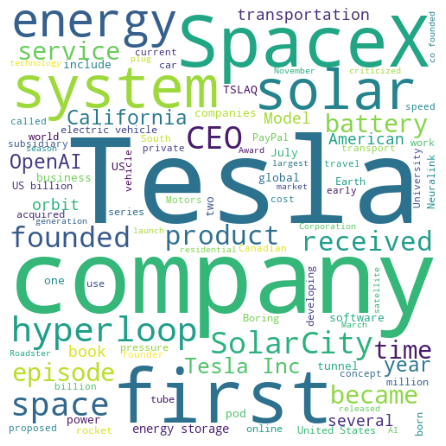

In [ ]:
one_wordcloud(500,500, 'white')

Elon is an entrepreneur, this can also be seen from the Wordcloud. Tesla and SpaceX in particular stand out here and are often used across articles.

#### Plots

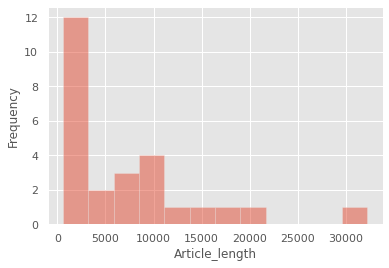

In [ ]:
plt.style.use('ggplot')
df['Article_length'].plot.hist(bins=12, alpha=0.5)
plt.xlabel('Article_length')
plt.show()

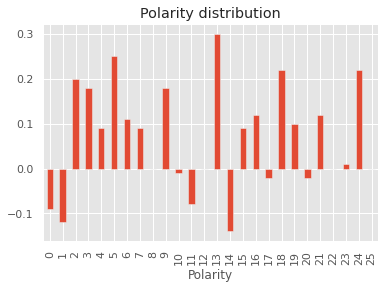

In [ ]:
df['Polarity'].plot(kind='bar')
plt.xlabel('Polarity')
plt.title('Polarity distribution')
plt.show()

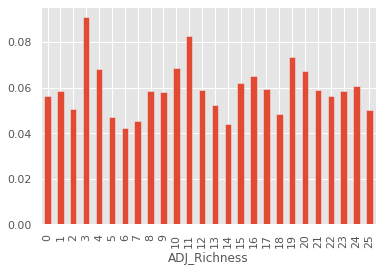

In [ ]:
df['ADJ_Richness'].plot.bar()
plt.xlabel('ADJ_Richness')
plt.show()

# Reflection

This task was very helpful to engage with the NLP techniques. I especially liked the fact that we didn't have a fixed framework and we could just try out new things. 

One learning was that with certain list creations, e.g. the most common words, I had to make sure that certain words were not counted (e.g. the name 'Elon Musk', because this occures very frequently but it doesn't add value to the report). This helped to find new information and I didn't expact this task in the first place.

I will write my master thesis also in the field of NLP, the focus is on sentiment analysis for chatbots. Therefore, it was especially helpful to get to know the polarity scores. 